In [159]:
import sklearn as skl
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing  
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
import sklearn
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from livelossplot import PlotLossesKerasTF

RANDOM_SEED = 2021

# Data Visualization

In [160]:
# Read csv file
df = pd.read_csv('../datasets/properties_data.csv')


In [161]:
# See first 5 lines
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [162]:
# See number of lines and columns (lines,columns)
df.shape


(1905, 38)

In [163]:
# See types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [164]:
# See number of different values of each attribute
df.nunique()

id                     1905
neighborhood             54
latitude                723
longitude               722
price                   821
size_in_sqft           1121
price_per_sqft         1784
no_of_bedrooms            6
no_of_bathrooms           6
quality                   4
maid_room                 2
unfurnished               2
balcony                   2
barbecue_area             2
built_in_wardrobes        2
central_ac                2
childrens_play_area       2
childrens_pool            2
concierge                 2
covered_parking           2
kitchen_appliances        2
lobby_in_building         2
maid_service              2
networked                 2
pets_allowed              2
private_garden            2
private_gym               2
private_jacuzzi           2
private_pool              2
security                  2
shared_gym                2
shared_pool               2
shared_spa                2
study                     2
vastu_compliant           2
view_of_landmark    

In [165]:
#See all Stats
df.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


In [166]:
# See Stats of attribute Price 
df['price'].describe()

count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

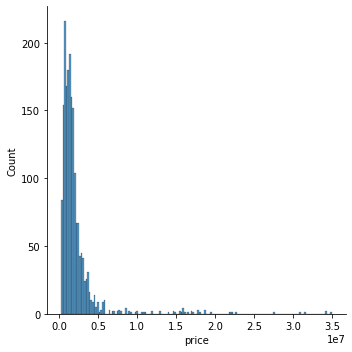

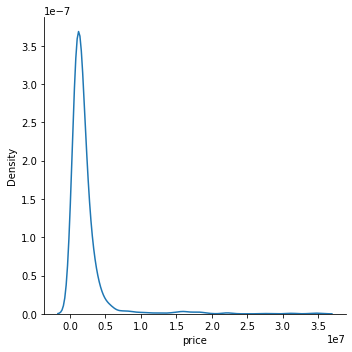

In [167]:
# See how prices are distributed
sns.displot(df,x="price")
sns.displot(df,x="price",kind="kde")

In [168]:
# Check for missing values or duplicated data
print(df.isna().sum())
print(df.duplicated().sum())

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64
0


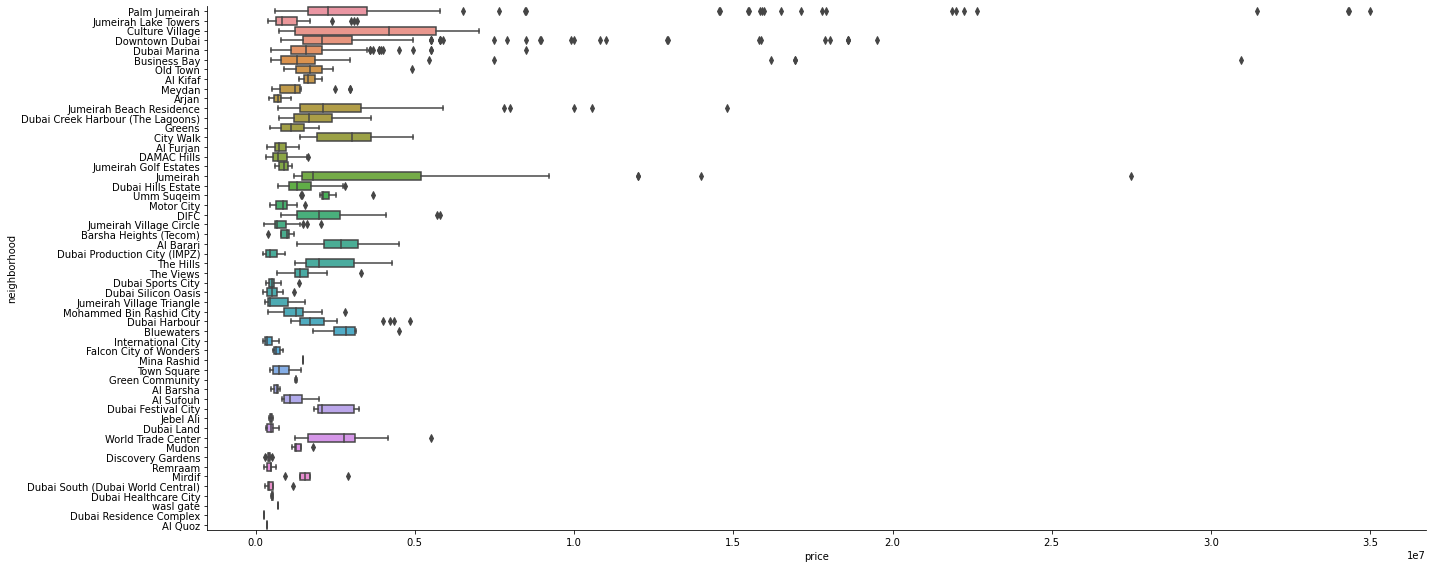

In [169]:
# Relationship between price and neighborhood
sns.catplot( x="price", y="neighborhood", data=df, kind="box", height=8, aspect=2.5)
plt.show()

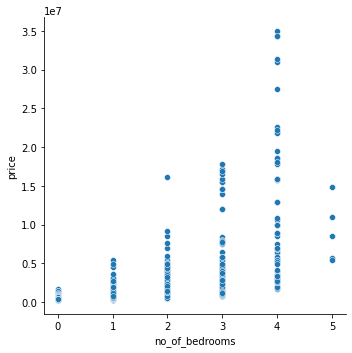

In [170]:
# Relationship between price and number of bedrooms
sns.relplot(x="no_of_bedrooms", y="price", data=df)

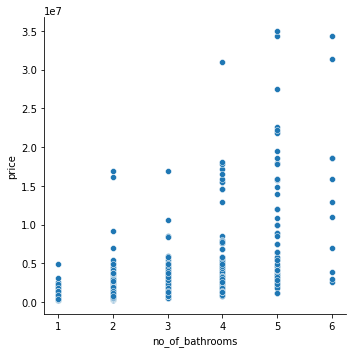

In [171]:
# Relationship between price and number of bathrooms
sns.relplot(x="no_of_bathrooms", y="price", data=df)

# Data Preparation

In [172]:
# Rename columns

# Drop columns
df.drop(['id'], axis=1,inplace=True)
df = df.iloc[:,:9]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   neighborhood     1905 non-null   object 
 1   latitude         1905 non-null   float64
 2   longitude        1905 non-null   float64
 3   price            1905 non-null   int64  
 4   size_in_sqft     1905 non-null   int64  
 5   price_per_sqft   1905 non-null   float64
 6   no_of_bedrooms   1905 non-null   int64  
 7   no_of_bathrooms  1905 non-null   int64  
 8   quality          1905 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 134.1+ KB


In [173]:
# Label encoding in quality
label_encoder = preprocessing.LabelEncoder()
df['quality']= label_encoder.fit_transform(df['quality'])
df.head()

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality
0,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,2
1,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,2
2,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,2
3,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,1
4,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,2


In [174]:
# Label Enconding in Neighborhood
label_encoder = preprocessing.LabelEncoder()
df['neighborhood']= label_encoder.fit_transform(df['neighborhood'])

In [175]:
df['neighborhood'].unique()

array([46, 36, 11, 15, 22,  9, 45,  3, 39,  6, 34, 16, 30, 10,  2, 12, 35,
       33, 20, 51, 43, 13, 37,  7,  0, 23, 48, 49, 27, 25, 38, 42, 18,  8,
       31, 28, 40, 50, 29,  1,  5, 17, 32, 21, 52, 44, 14, 47, 41, 26, 19,
       53, 24,  4])

In [176]:
#Normalize Neighboorhood values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['neighborhood']] = min_max_scaler.fit_transform(df[['neighborhood']])
df['neighborhood'].describe()

count    1905.000000
mean        0.511841
std         0.249825
min         0.000000
25%         0.283019
50%         0.415094
75%         0.698113
max         1.000000
Name: neighborhood, dtype: float64

In [177]:
#Normalize Size In Sqft values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['size_in_sqft']] = min_max_scaler.fit_transform(df[['size_in_sqft']])
df['size_in_sqft'].describe()

count    1905.000000
mean        0.120992
std         0.096045
min         0.000000
25%         0.058824
50%         0.105257
75%         0.151799
max         1.000000
Name: size_in_sqft, dtype: float64

In [178]:
#Normalize Price Per Sqft values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['price_per_sqft']] = min_max_scaler.fit_transform(df[['price_per_sqft']])
df['price_per_sqft'].describe()

count    1905.000000
mean        0.217231
std         0.150422
min         0.000000
25%         0.114548
50%         0.181755
75%         0.283670
max         1.000000
Name: price_per_sqft, dtype: float64

In [179]:
#Normalize Nr of Bedrooms values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['no_of_bedrooms']] = min_max_scaler.fit_transform(df[['no_of_bedrooms']])
df['no_of_bedrooms'].describe()

count    1905.000000
mean        0.358635
std         0.189898
min         0.000000
25%         0.200000
50%         0.400000
75%         0.400000
max         1.000000
Name: no_of_bedrooms, dtype: float64

In [180]:
#Normalize Nr of Bathrooms values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['no_of_bathrooms']] = min_max_scaler.fit_transform(df[['no_of_bathrooms']])
df['no_of_bathrooms'].describe()

count    1905.000000
mean        0.302572
std         0.212623
min         0.000000
25%         0.200000
50%         0.200000
75%         0.400000
max         1.000000
Name: no_of_bathrooms, dtype: float64

In [181]:
# Calculate IQR (Inter Quartile Range)
Q1 = np.percentile(df['price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Dimensions: ", df.shape)

# Define upper bound
upper = np.where(df['price'] >= (Q3+1.5*IQR))
# Define lower bound
lower = np.where(df['price'] <= (Q1-1.5*IQR))

#Remove outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Dimensions: ", df.shape)

Old Dimensions:  (1905, 9)
New Dimensions:  (1777, 9)


# Train/test data split

In [182]:
x = df.drop(['price'],axis=1)
y = df['price'].to_frame()

In [183]:
x_train, x_test, y_train, y_test1 = train_test_split(x,y,test_size=0.25,random_state=RANDOM_SEED)

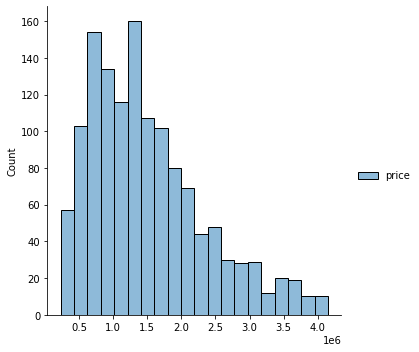

In [184]:
sns.displot(y_train)

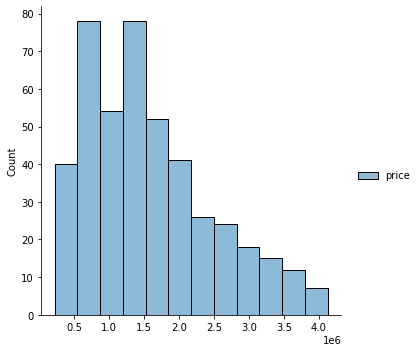

In [185]:
sns.displot(y_test1)

# Linear Regression

In [186]:
lm = LinearRegression()
lm.fit(x_train,y_train)
predictionsLR = lm.predict(x_test)

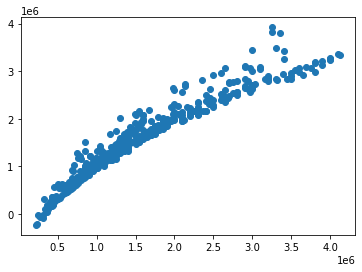

In [187]:
plt.scatter(y_test1, predictionsLR)

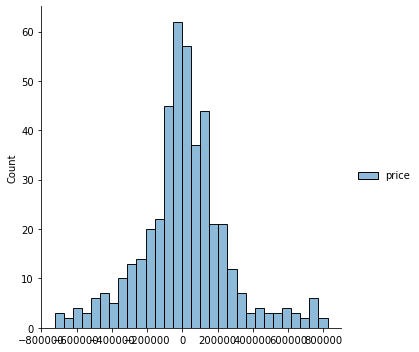

In [188]:
sns.displot((y_test1-predictionsLR), bins=30)

In [189]:
# Model Evaluation
coeff_df = pd.DataFrame(lm.coef_[0], x.columns, columns=['Coefficient'])
print(coeff_df)

                  Coefficient
neighborhood    -3.909919e+04
latitude         1.045014e+05
longitude        1.339982e+05
size_in_sqft     8.975833e+06
price_per_sqft   5.029570e+06
no_of_bedrooms   3.538656e+05
no_of_bathrooms  1.482607e+05
quality         -9.117520e+03


In [190]:
#MAE
metrics.mean_absolute_error(y_test1,predictionsLR)


178092.749069489

In [ ]:
#MSE
metrics.mean_squared_error(y_test1, predictionsLR)

62995077155.87196

In [ ]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test1, predictionsLR))

250988.20122840826

# Decision Trees (Regression)

In [193]:
dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)
dtr.fit(x_train, np.ravel(y_train))

DecisionTreeRegressor(random_state=2021)

In [194]:
predictionsDT = dtr.predict(x_test)
predictionsDT

array([2250000., 1825000., 1595000., 1200000., 1471888.,  660600.,
       1540000., 2800000., 1900000., 1050000.,  815000., 3175000.,
       1550000.,  680000., 2400000., 1991888.,  399000.,  600000.,
        675000., 1254462., 1650000.,  610000., 2500000., 2200000.,
        900000., 1425000., 1950000., 1050000., 3950000., 2110000.,
       1350000., 2700000.,  620000.,  410000., 2400000., 3700000.,
        360000., 3100000.,  443850.,  709000., 1286000., 2063888.,
       3499000.,  970000., 1100000., 1175000., 1350000., 1770000.,
        330000., 1200000.,  808255.,  656000., 2789900., 1400000.,
       3200000.,  626999., 2250000.,  370000., 1599990.,  568801.,
       1780888., 1690000.,  350000., 1170000., 1499998., 4000000.,
       1737000., 3489900.,  930000., 2140000., 2974999., 1650000.,
       2353146., 3600000., 2700000., 3175000.,  860000., 1722888.,
       2800000., 3400000., 1540000., 2800000.,  617000.,  850000.,
       1380888., 1785000.,  580000., 2100000., 1550000., 29500

In [195]:
#MAE
metrics.mean_absolute_error(y_test1,predictionsDT)


68293.60898876404

In [196]:
#MSE
metrics.mean_squared_error(y_test1, predictionsDT, squared=True)

14619723784.026966

In [197]:
#RMSE
metrics.mean_squared_error(y_test1, predictionsDT, squared=False)

120912.04978837703

In [198]:
#Cross Validation
scores = cross_val_score(dtr,x,y,cv=10)
print(scores)
print("RESULT: %0.2f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.97906043 0.97759194 0.98372432 0.98236922 0.99048409 0.96578953
 0.94419076 0.98575658 0.98946377 0.98908868]
RESULT: 0.98 accuracy with standard deviation of 0.01


# MultiLayer Perceptron (MLP)

In [199]:
#Scale the features between [0-1]
scaler_x = MinMaxScaler(feature_range=(0,1)).fit(x)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
x_scaled = pd.DataFrame(scaler_x.transform(x[x.columns]), columns=x.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [200]:
x.head()

,neighborhood,latitude,longitude,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality
0,0.867925,25.113208,55.138932,0.084572,0.481649,0.2,0.2,2
1,0.867925,25.106809,55.151201,0.138763,0.323954,0.4,0.2,2
2,0.679245,25.063302,55.137728,0.178518,0.051208,0.6,0.8,2
3,0.207547,25.227295,55.341761,0.185951,0.236053,0.4,0.4,1
4,0.867925,25.114275,55.139764,0.022948,0.686044,0.0,0.0,2


In [201]:
x_scaled.head()

,neighborhood,latitude,longitude,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality
0,0.867925,0.606470,0.186996,0.143694,0.573995,0.25,0.2,0.666667
1,0.867925,0.590772,0.219950,0.235768,0.386065,0.50,0.2,0.666667
2,0.679245,0.484041,0.183763,0.303313,0.061026,0.75,0.8,0.666667
3,0.207547,0.886348,0.731779,0.315944,0.281311,0.50,0.4,0.333333
4,0.867925,0.609088,0.189231,0.038990,0.817578,0.00,0.0,0.666667


In [202]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=RANDOM_SEED)

In [203]:
#em vez do relu usar o softmax - sugestao da prof
#modelo MLP com 7 camadas
def build_model(activation='relu', learning_rate=0.01):
    model=Sequential()
    model.add(Dense(16,input_dim=8,activation=activation))
    model.add(Dense(8,activation=activation))
    model.add(Dense(4,activation=activation))
    model.add(Dense(2,activation=activation))
    model.add(Dense(1,activation='relu'))

    model.compile(
        loss='mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae','mse'])
    return model


In [204]:
model = build_model()
model.summary()

Model: "sequential_375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2309 (Dense)           (None, 16)                144       
_________________________________________________________________
dense_2310 (Dense)           (None, 8)                 136       
_________________________________________________________________
dense_2311 (Dense)           (None, 4)                 36        
_________________________________________________________________
dense_2312 (Dense)           (None, 2)                 10        
_________________________________________________________________
dense_2313 (Dense)           (None, 1)                 3         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [205]:
#encontrar o melhor MLP possivel
TURNING_DICT = {
    'activation': ['relu','sigmoid'],
    'learning_rate':[0.01,0.001]
}

In [206]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV(estimator=model, param_grid=TURNING_DICT, cv=kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)
grid_search.fit(x_train, y_train, validation_split=0.2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/20
29/29 [==============================] - 1s 14ms/step - loss: 0.3295 - mae: 0.3295 - mse: 0.1528 - val_loss: 0.3201 - val_mae: 0.3201 - val_mse: 0.1413
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3295 - mae: 0.3295 - mse: 0.1528 - val_loss: 0.3201 - val_mae: 0.3201 - val_mse: 0.1413
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3295 - mae: 0.3295 - mse: 0.1528 - val_loss: 0.3201 - val_mae: 0.3201 - val_mse: 0.1413
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.3295 - mae: 0.3295 - mse: 0.1528 - val_loss: 0.3201 - val_mae: 0.3201 - val_mse: 0.1413
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3295 - mae: 0.3295 - mse: 0.1528 - val_loss: 0.3201 - val_mae: 0.3201 - val_mse: 0.1413
Epoch 6/20
29/29 [==============================] - 0s 5ms/step - loss: 0.3295 - mae: 0.3295 - mse: 0.1528 - val_loss: 0.3201 - v

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f7d1c1d57b8>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.01, 0.001]},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [207]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

Best: -0.147123 using {'activation': 'relu', 'learning_rate': 0.01}
-0.147123 (0.145926) with: {'activation': 'relu', 'learning_rate': 0.01}
-0.214952 (0.140457) with: {'activation': 'relu', 'learning_rate': 0.001}
-0.270927 (0.117853) with: {'activation': 'sigmoid', 'learning_rate': 0.01}
-0.194213 (0.064252) with: {'activation': 'sigmoid', 'learning_rate': 0.001}


In [208]:
#para ver se o nosso modelo está overfitted

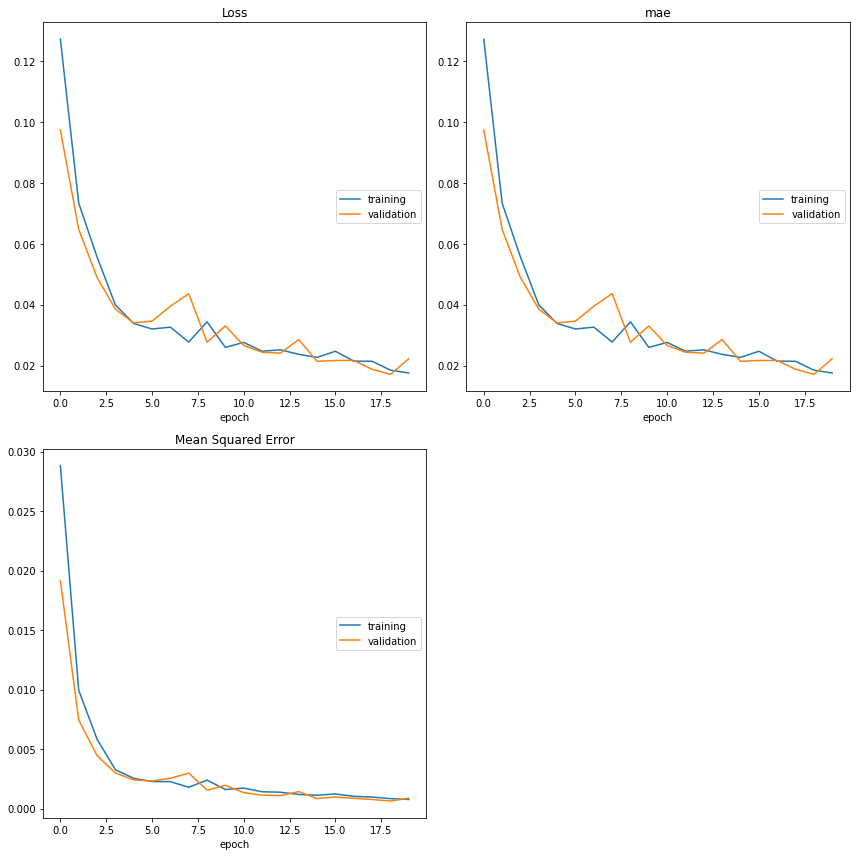

Loss
	training         	 (min:    0.018, max:    0.127, cur:    0.018)
	validation       	 (min:    0.017, max:    0.097, cur:    0.022)
mae
	training         	 (min:    0.018, max:    0.127, cur:    0.018)
	validation       	 (min:    0.017, max:    0.097, cur:    0.022)
Mean Squared Error
	training         	 (min:    0.001, max:    0.029, cur:    0.001)
	validation       	 (min:    0.001, max:    0.019, cur:    0.001)


In [209]:
best_mlp_model = grid_search.best_estimator_
best_mlp_model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),callbacks=[PlotLossesKerasTF()],verbose=1)

In [210]:
#Get predictions
predictionsMLP = best_mlp_model.predict(x_test)
predictionsMLP = predictionsMLP.reshape(predictionsMLP.shape[0],1)
predictionsMLP[:5] 

array([[0.55375725],
       [0.40826803],
       [0.36033428],
       [0.24564594],
       [0.31122467]], dtype=float32)

In [211]:
# unscale the y_test
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_test_unscaled[:5]

array([[2360000.],
       [1790000.],
       [1550000.],
       [1150000.],
       [1500000.]])

In [212]:
# unscale the model prediction 
predictionsMLP_unscaled = scaler_y.inverse_transform(predictionsMLP)
predictionsMLP_unscaled[:5]

array([[2396266. ],
       [1824493.4],
       [1636113.8],
       [1185388.5],
       [1443112.9]], dtype=float32)

In [213]:
print('MAE:',metrics.mean_absolute_error(y_test_unscaled,predictionsMLP_unscaled))
print('MSE:',metrics.mean_squared_error(y_test_unscaled,predictionsMLP_unscaled))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_unscaled,predictionsMLP_unscaled)))

MAE: 87422.87210323036
MSE: 13523977150.714931
RMSE: 116292.63584043029


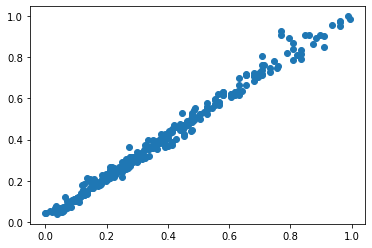

In [214]:
plt.scatter(y_test,predictionsMLP)

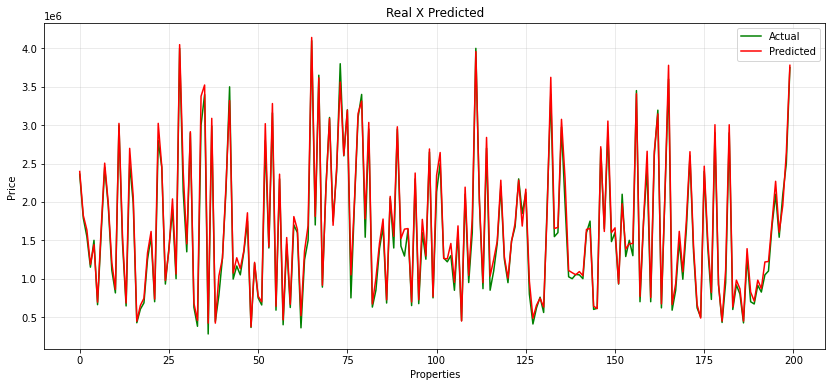

In [215]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test_unscaled[:limit], color='green',label="Actual")
    plt.plot(predictionsMLP_unscaled[:limit],color="red",label="Predicted")
    plt.grid(alpha=0.3)
    plt.xlabel('Properties')
    plt.ylabel('Price')
    plt.title('Real X Predicted')
    plt.legend()
    plt.show()

real_predicted_viz(200)    

In [216]:
# Compare model results 
print("MLP results\n")
print('MAE:',metrics.mean_absolute_error(y_test_unscaled,predictionsMLP_unscaled))
print('MSE:',metrics.mean_squared_error(y_test_unscaled,predictionsMLP_unscaled))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_unscaled,predictionsMLP_unscaled)))
print('-------------------------------------------------------------')
print('DecisionTreeRegressor results:\n')
print('MAE:',metrics.mean_absolute_error(y_test1,predictionsDT))
print('MSE:',metrics.mean_squared_error(y_test1, predictionsDT, squared=True))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test1, predictionsDT, squared=False)))
print('-------------------------------------------------------------')
print('LinearRegressor results:\n')
print('MAE:',metrics.mean_absolute_error(y_test1,predictionsLR))
print('MSE:',metrics.mean_squared_error(y_test1, predictionsLR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test1, predictionsLR)))



MLP results

MAE: 87422.87210323036
MSE: 13523977150.714931
RMSE: 116292.63584043029
-------------------------------------------------------------
DecisionTreeRegressor results:

MAE: 68293.60898876404
MSE: 14619723784.026966
RMSE: 347.7241000971561
-------------------------------------------------------------
LinearRegressor results:

MAE: 178092.749069489
MSE: 62995077155.87196
RMSE: 250988.20122840826
